In [ ]:
# Instalar a biblioteca Roboflow (caso ainda não esteja instalada)
!pip install -U roboflow

# Escreve o arquivo .env_roboflow com a chave
with open("keys.env", "w") as f:
    f.write("ROBOFLOW_API_KEY=KEY\n") #trocar KEY pela chave do roboflow

# Lê a chave do arquivo e define como variável de ambiente
import os
with open("keys.env") as f:
    for line in f:
        if line.startswith("ROBOFLOW_API_KEY="):
            key = line.strip().split("=")[1]
            os.environ["ROBOFLOW_API_KEY"] = key

# Usa a chave de forma segura
from roboflow import Roboflow
rf = Roboflow(api_key=os.getenv("ROBOFLOW_API_KEY"))


In [4]:
project = rf.workspace("andrew-hofer-1qh7e").project("bees-ytrmp")
dataset = project.version(5).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bees-5 in yolov8:: 100%|██████████| 12858/12858 [00:01<00:00, 11058.05it/s]


In [5]:
import os
import shutil

# Caminho original do dataset
original_path = dataset.location  # normalmente 'bees-5'

# Novo nome desejado
new_path = "bees"

# Renomear a pasta
if os.path.exists(original_path):
    shutil.move(original_path, new_path)
    print(f"Pasta renomeada para: {new_path}")
else:
    print(f"Pasta '{original_path}' não encontrada.")

Pasta renomeada para: bees


In [4]:
!pip install -U ultralytics[full] opencv-python matplotlib ipykernel notebook jupyter


In [6]:
# bees.yaml
bees_yaml = """path: bees
train: train
val: valid
test: test

names:
  0: bee-queen-mite
  1: bee
  2: mite
  3: pollen
  4: queen
  5: queen_cell
  6: varroa
"""

with open("bees.yaml", "w") as f:
    f.write(bees_yaml)

# env.yml
env_yml = """name: yolov8_env
channels:
  - conda-forge
  - pytorch
  - defaults
dependencies:
  - python=3.10
  - pip
  - ipython          # opcional, para notebooks locais
  - pip:
      - ultralytics[full]
      - opencv-python
      - matplotlib
      - ipykernel
      - notebook
      - jupyter
"""

with open("env.yml", "w") as f:
    f.write(env_yml)


In [8]:
from ultralytics import YOLO

# carregar o modelo pré-treinado (por exemplo, yolov8n.pt para mais leve)
model = YOLO("yolov8n.pt")  # ou 'yolov8s.pt', 'yolov8m.pt'...

# treinar
model = YOLO("yolov8n.pt")  # modelo leve

model.train(
    data="bees.yaml",
    epochs=50,
    imgsz=160,
    batch=8,  # controle de memória
    workers=2,  # também ajuda em casos de gargalo de leitura
    device=0  # força uso da GPU (opcional)
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/kleber/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 11.3MB/s]


Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bees.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

100%|██████████| 755k/755k [00:00<00:00, 3.41MB/s]

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 8.30MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.4 ms, read: 13.4±12.6 MB/s, size: 9.4 KB)


train: Scanning /home/kleber/bees/train/labels... 4496 images, 771 backgrounds, 0 corrupt: 100%|██████████| 4496/4496 [00:06<00:00, 724.62it/s] 


train: New cache created: /home/kleber/bees/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2089, len(boxes) = 17098. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access ✅ (ping: 0.2±0.2 ms, read: 19.2±5.9 MB/s, size: 10.0 KB)


val: Scanning /home/kleber/bees/valid/labels... 1285 images, 239 backgrounds, 0 corrupt: 100%|██████████| 1285/1285 [00:02<00:00, 608.00it/s]

val: New cache created: /home/kleber/bees/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4517. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.182G      2.611       2.87      1.283         30        160: 100%|██████████| 562/562 [01:09<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  7.11it/s]


                   all       1285       4517      0.721      0.131     0.0691     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.213G      2.512      2.098      1.235         17        160: 100%|██████████| 562/562 [00:57<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.33it/s]


                   all       1285       4517      0.561      0.121      0.097     0.0381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.242G      2.452      1.952      1.197         13        160: 100%|██████████| 562/562 [00:56<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.36it/s]

                   all       1285       4517      0.586      0.141      0.128     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      0.26G      2.406      1.887      1.201         46        160: 100%|██████████| 562/562 [00:52<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.37it/s]


                   all       1285       4517      0.579      0.142      0.129     0.0504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.277G      2.362      1.805      1.184         23        160: 100%|██████████| 562/562 [00:54<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.67it/s]

                   all       1285       4517      0.605      0.144       0.14     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.295G        2.3      1.783      1.183         34        160: 100%|██████████| 562/562 [01:04<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  6.96it/s]

                   all       1285       4517      0.585      0.152      0.123     0.0509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.311G      2.323      1.768      1.167         22        160: 100%|██████████| 562/562 [01:05<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.80it/s]


                   all       1285       4517      0.611      0.145      0.142     0.0611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.328G      2.237      1.688      1.147         46        160: 100%|██████████| 562/562 [01:00<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.61it/s]


                   all       1285       4517      0.608      0.161      0.159     0.0645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.346G      2.249      1.691      1.147         55        160: 100%|██████████| 562/562 [00:52<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00, 10.06it/s]


                   all       1285       4517      0.817      0.158      0.162     0.0665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.363G      2.201       1.68      1.155         88        160: 100%|██████████| 562/562 [00:58<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.55it/s]


                   all       1285       4517      0.613      0.157      0.155     0.0665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.379G      2.208      1.659      1.146         79        160: 100%|██████████| 562/562 [01:00<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.94it/s]

                   all       1285       4517       0.42      0.161      0.165     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.396G      2.167      1.636      1.135         60        160: 100%|██████████| 562/562 [00:50<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.66it/s]


                   all       1285       4517      0.416       0.22      0.179     0.0706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.414G      2.159      1.629       1.13        106        160: 100%|██████████| 562/562 [00:52<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.54it/s]

                   all       1285       4517      0.417      0.164      0.162     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      0.43G      2.148      1.598      1.121         21        160: 100%|██████████| 562/562 [00:55<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00, 10.09it/s]

                   all       1285       4517      0.663      0.236      0.217      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.447G      2.125        1.6      1.119         65        160: 100%|██████████| 562/562 [00:53<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.25it/s]

                   all       1285       4517      0.438      0.205      0.173     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.465G      2.131      1.553      1.119         41        160: 100%|██████████| 562/562 [01:01<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.74it/s]


                   all       1285       4517      0.575      0.242      0.245      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.482G      2.077       1.54      1.111         27        160: 100%|██████████| 562/562 [00:58<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.09it/s]


                   all       1285       4517      0.501      0.238       0.25      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.498G      2.098      1.531      1.105         94        160: 100%|██████████| 562/562 [00:55<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.11it/s]

                   all       1285       4517      0.536      0.246      0.263      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.516G      2.068      1.511      1.104         23        160: 100%|██████████| 562/562 [01:02<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.03it/s]


                   all       1285       4517      0.466      0.191      0.187     0.0841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.531G       2.04      1.472      1.095         47        160: 100%|██████████| 562/562 [01:06<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  7.08it/s]

                   all       1285       4517      0.682      0.201      0.215     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.549G      2.046      1.469      1.102         40        160: 100%|██████████| 562/562 [01:09<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  7.19it/s]


                   all       1285       4517      0.824      0.259      0.288      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.566G      2.023      1.501      1.109         28        160: 100%|██████████| 562/562 [01:03<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  8.05it/s]

                   all       1285       4517      0.714        0.2      0.216      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.584G      2.013      1.458      1.099         24        160: 100%|██████████| 562/562 [00:59<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  6.78it/s]


                   all       1285       4517      0.683      0.285      0.231      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       0.6G      2.067      1.483      1.109         43        160: 100%|██████████| 562/562 [01:11<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.49it/s]


                   all       1285       4517      0.535      0.309      0.293      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.617G      2.023       1.43      1.092         15        160: 100%|██████████| 562/562 [01:05<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.18it/s]

                   all       1285       4517      0.741      0.287      0.294      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.635G      1.998      1.409      1.084         22        160: 100%|██████████| 562/562 [01:02<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.60it/s]

                   all       1285       4517      0.776        0.3      0.319      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.652G      2.003      1.411      1.091         87        160: 100%|██████████| 562/562 [00:59<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.01it/s]


                   all       1285       4517      0.325      0.322      0.302      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.668G      2.021      1.423      1.096         46        160: 100%|██████████| 562/562 [00:57<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.43it/s]

                   all       1285       4517       0.75      0.296      0.309      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.686G      1.991      1.402      1.083         25        160: 100%|██████████| 562/562 [00:58<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.42it/s]


                   all       1285       4517      0.565      0.317      0.325      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.703G      1.957      1.369       1.07         21        160: 100%|██████████| 562/562 [00:58<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.96it/s]

                   all       1285       4517      0.836      0.227      0.298      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.721G      1.967      1.393      1.077         30        160: 100%|██████████| 562/562 [00:52<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  9.00it/s]


                   all       1285       4517      0.578       0.25      0.285      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.736G      1.955      1.374      1.086         49        160: 100%|██████████| 562/562 [00:51<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:07<00:00, 10.77it/s]

                   all       1285       4517       0.53      0.286      0.264      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.754G      1.947       1.36      1.066         93        160: 100%|██████████| 562/562 [00:53<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:07<00:00, 10.56it/s]

                   all       1285       4517      0.679      0.295      0.314      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.771G      1.914      1.319       1.06         29        160: 100%|██████████| 562/562 [00:53<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.54it/s]

                   all       1285       4517      0.408      0.322      0.314      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.787G      1.932      1.347      1.058         17        160: 100%|██████████| 562/562 [01:00<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.79it/s]

                   all       1285       4517      0.771      0.279      0.293      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.805G      1.922       1.34      1.074         63        160: 100%|██████████| 562/562 [00:59<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.11it/s]


                   all       1285       4517      0.558      0.348      0.337       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.822G       1.95      1.343      1.061         46        160: 100%|██████████| 562/562 [00:59<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.17it/s]

                   all       1285       4517      0.607       0.35      0.314      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      0.84G      1.882      1.332      1.058         67        160: 100%|██████████| 562/562 [01:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.65it/s]

                   all       1285       4517      0.706      0.348      0.347      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.855G      1.927      1.359      1.068        133        160: 100%|██████████| 562/562 [01:02<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.61it/s]


                   all       1285       4517      0.618      0.327      0.334      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.873G      1.873      1.288      1.053         70        160: 100%|██████████| 562/562 [01:00<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.75it/s]

                   all       1285       4517      0.619      0.349      0.351      0.155


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.891G      1.866      1.268      1.052         16        160: 100%|██████████| 562/562 [01:00<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.76it/s]

                   all       1285       4517      0.638       0.33      0.344      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.908G      1.822      1.194      1.051         12        160: 100%|██████████| 562/562 [00:59<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.68it/s]

                   all       1285       4517      0.545      0.384      0.324      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.924G      1.815      1.181      1.033          7        160: 100%|██████████| 562/562 [00:59<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.90it/s]

                   all       1285       4517      0.648      0.345      0.347      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.941G      1.811      1.169      1.035         10        160: 100%|██████████| 562/562 [00:57<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.33it/s]

                   all       1285       4517      0.644       0.34      0.371      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.959G      1.801      1.156       1.03          8        160: 100%|██████████| 562/562 [00:59<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.33it/s]

                   all       1285       4517      0.667      0.318      0.346      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.975G      1.784       1.14      1.022         26        160: 100%|██████████| 562/562 [00:59<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.42it/s]


                   all       1285       4517      0.632      0.357      0.358      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.992G      1.794      1.153      1.033         15        160: 100%|██████████| 562/562 [01:00<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:07<00:00, 10.23it/s]

                   all       1285       4517      0.661      0.346      0.356      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.01G      1.768      1.123      1.031         20        160: 100%|██████████| 562/562 [00:57<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.16it/s]

                   all       1285       4517      0.582      0.377      0.355      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.03G      1.757      1.114      1.024          9        160: 100%|██████████| 562/562 [00:58<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.42it/s]


                   all       1285       4517      0.656      0.352       0.37      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.04G      1.772       1.12      1.034         10        160: 100%|██████████| 562/562 [00:59<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.73it/s]

                   all       1285       4517      0.662      0.353      0.359       0.18



50 epochs completed in 0.957 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:12<00:00,  6.30it/s]


                   all       1285       4517      0.656      0.352       0.37      0.183
        bee-queen-mite        128       1239      0.746      0.233      0.367      0.144
                  mite         16         36          1          0          0          0
                pollen         39         39      0.219      0.154      0.126     0.0495
                 queen          7         13       0.54      0.846      0.745      0.393
            queen_cell        910       3190      0.777      0.525       0.61      0.329
Speed: 0.3ms preprocess, 1.3ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe1580a5c70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [9]:
# Testar
metrics = model.val()
print(metrics)

# prever em imagens
results = model.predict(source="bees/test/images", save=True)
# salvar pesos treinados manualmente
model.save("modelo_bees.pt")

Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 6.2±1.1 MB/s, size: 7.6 KB)


val: Scanning /home/kleber/bees/valid/labels.cache... 1285 images, 239 backgrounds, 0 corrupt: 100%|██████████| 1285/1285 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4517. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 161/161 [00:14<00:00, 10.97it/s]


                   all       1285       4517      0.656      0.352       0.37      0.183
        bee-queen-mite        128       1239      0.744      0.232      0.367      0.144
                  mite         16         36          1          0          0          0
                pollen         39         39      0.219      0.154      0.126     0.0495
                 queen          7         13      0.541      0.846      0.745      0.393
            queen_cell        910       3190      0.778      0.527       0.61      0.329
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe150644370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_resul

image 1/642 /home/kleber/bees/test/images/10-varroas-sucre-glace-1-576x1024_jpg.rf.285d4ae42e6f136d72ccb4d39560015d.jpg: 160x160 (no detections), 9.6ms
image 2/642 /home/kleber/bees/test/images/10_JPEG_jpg.rf.02c91ad4afb7de7c7e4466e8c252b9e4.jpg: 160x160 1 queen_cell, 28.3ms
image 3/642 /home/kleber/bees/test/images/10_JPEG_jpg.rf.1ba169f0d6b66e4141c57609e650e9f6.jpg: 160x160 1 queen_cell, 21.1ms
image 4/642 /home/kleber/bees/test/images/10_JPEG_jpg.rf.1de1849d682f7be496b7f590663b034c.jpg: 160x160 1 queen_cell, 15.3ms
image 5/642 /home/kleber/bees/test/images/10_JPEG_jpg.rf.767a0e1ac04068598d98dc191fbbf45a.jpg: 160x160 1 queen_cell, 13.0ms
image 6/642 /home/kleber/bees/test/images/10_JPEG_jpg.rf.a977851f2f820f81285f826c291adfb1.jpg: 160x160 1 queen_cell, 12.0ms
image 7/642 /home/kleber/bees/test/images/110_JPEG_jpg.rf.15fbba743a3080fdb8f1382038361790.jpg: 160x160 1 queen_cell, 9.6ms
image 8/642 /home/kleber/bees/test/images/110_JPEG_jpg.rf.72b0a01140c2eaa828a8f5602bc4ae54.jpg: 160x160 

image 65/642 /home/kleber/bees/test/images/2017-08-28_16-32-55_30_sec-mp4-bee_id_6687-915-1_png_jpg.rf.fc62d4ad140a24a3e080b22e4b36a2b8.jpg: 160x160 3 queen_cells, 23.7ms
image 66/642 /home/kleber/bees/test/images/2017-09-01_20-00-17-mp4-bee_id_9-1950-1_png_jpg.rf.b233877c115b29c5d0e82a3b1536057d.jpg: 160x160 1 queen_cell, 12.8ms
image 67/642 /home/kleber/bees/test/images/2017-09-01_3-01-01-mp4-bee_id_2248-19560-1_png_jpg.rf.46163b8b12dc04421639bb839b9fa89c.jpg: 160x160 2 queen_cells, 18.8ms
image 68/642 /home/kleber/bees/test/images/2017-09-01_3-01-01-mp4-bee_id_2248-19560-1_png_jpg.rf.82624b6c2a87b95286bec26bdeb759c1.jpg: 160x160 2 queen_cells, 8.8ms
image 69/642 /home/kleber/bees/test/images/2017-09-01_3-01-01-mp4-bee_id_2249-19830-1_png_jpg.rf.96263780eeee491e9e83fd89c7098ae3.jpg: 160x160 1 queen_cell, 7.5ms
image 70/642 /home/kleber/bees/test/images/2017-09-01_3-01-01-mp4-bee_id_2251-21180-1_png_jpg.rf.2c122be945452bed88c12dae99567ae0.jpg: 160x160 2 queen_cells, 14.8ms
image 71/64

image 115/642 /home/kleber/bees/test/images/2017-09-01_3-01-01-mp4-bee_id_2324-50115-1_png_jpg.rf.83a519bba00f9f3a1a6163d23a4ad9df.jpg: 160x160 2 queen_cells, 15.6ms
image 116/642 /home/kleber/bees/test/images/2017-09-01_3-01-01-mp4-bee_id_2326-50160-1_png_jpg.rf.21868b525a49c2366426b1996a568bc7.jpg: 160x160 2 queen_cells, 13.9ms
image 117/642 /home/kleber/bees/test/images/2017-09-01_3-01-01-mp4-bee_id_2326-50160-1_png_jpg.rf.c22133f859d457a7e376cff9d2bcf630.jpg: 160x160 2 queen_cells, 7.3ms
image 118/642 /home/kleber/bees/test/images/2017-09-01_3-01-01-mp4-bee_id_2327-50220-1_png_jpg.rf.46b3e59a945b810f284ddd03b94e659e.jpg: 160x160 2 queen_cells, 14.7ms
image 119/642 /home/kleber/bees/test/images/2017-09-01_3-01-01-mp4-bee_id_2328-50280-1_png_jpg.rf.30c594ebd4e029b5978f71b1acea4b5c.jpg: 160x160 2 queen_cells, 7.1ms
image 120/642 /home/kleber/bees/test/images/2017-09-01_3-01-01-mp4-bee_id_2328-50280-1_png_jpg.rf.6cf22fb05b42ed8b61842dbbf8783064.jpg: 160x160 2 queen_cells, 7.9ms
image 1

image 165/642 /home/kleber/bees/test/images/2017-09-25_16-03-38-mp4-bee_id_1399-45990-1_png_jpg.rf.28cc7bdbf59ec5a02f1a5c051d29a607.jpg: 160x160 3 queen_cells, 8.5ms
image 166/642 /home/kleber/bees/test/images/2017-09-25_16-03-38-mp4-bee_id_1400-46005-1_png_jpg.rf.6879c447fb9a62946318cec5468f40a9.jpg: 160x160 1 queen_cell, 9.4ms
image 167/642 /home/kleber/bees/test/images/2017-09-25_16-03-38-mp4-bee_id_1400-46005-1_png_jpg.rf.89b3ab879614a32203e3c775e86511c8.jpg: 160x160 2 queen_cells, 9.0ms
image 168/642 /home/kleber/bees/test/images/2017-09-25_16-03-38-mp4-bee_id_1401-46020-1_png_jpg.rf.5179c59ff9eaa37d980283abf695b412.jpg: 160x160 2 queen_cells, 15.7ms
image 169/642 /home/kleber/bees/test/images/20220817_122338_jpg.rf.feb02ecedbe916d3943131e0b360bccc.jpg: 160x160 2 bee-queen-mites, 7.1ms
image 170/642 /home/kleber/bees/test/images/20230328_140442_jpg.rf.f61d0d949f26153f678988f0663f6065.jpg: 160x160 (no detections), 7.3ms
image 171/642 /home/kleber/bees/test/images/20230328_140831_jp

image 228/642 /home/kleber/bees/test/images/2_JPEG_jpg.rf.ff6cf3e0308103214423c4e62ccb94b5.jpg: 160x160 1 queen_cell, 12.9ms
image 229/642 /home/kleber/bees/test/images/2_PNG_jpg.rf.c9155921da9442c73f96f395ddd0acf0.jpg: 160x160 1 queen_cell, 20.7ms
image 230/642 /home/kleber/bees/test/images/2g916gk_jpg.rf.532ad6557884700df3f1c92ca2af413e.jpg: 160x160 1 queen_cell, 11.0ms
image 231/642 /home/kleber/bees/test/images/2g916gk_jpg.rf.6f17050d8761c5029897524744f75fba.jpg: 160x160 1 pollen, 1 queen_cell, 12.6ms
image 232/642 /home/kleber/bees/test/images/2images-8_jpeg.rf.d33bd4b64b7e96fec52dc5ac3629176c.jpg: 160x160 2 bee-queen-mites, 3 queens, 16.9ms
image 233/642 /home/kleber/bees/test/images/3-Photo-comptage-des-varroas-phoretiques-2_jpg.rf.5221c1210bbb0f1953f5e8d3f2670e0c.jpg: 160x160 1 queen_cell, 7.5ms
image 234/642 /home/kleber/bees/test/images/3-Photo-comptage-des-varroas-phoretiques-2_jpg.rf.a1917903cb6fec085f11daae6f60b7fd.jpg: 160x160 1 queen_cell, 13.3ms
image 235/642 /home/kleb

image 291/642 /home/kleber/bees/test/images/491_JPEG_jpg.rf.abf53965e10a144869f405f947c50aac.jpg: 160x160 2 queen_cells, 7.1ms
image 292/642 /home/kleber/bees/test/images/491_JPEG_jpg.rf.f02e286750fcaf91b26d2766886f6401.jpg: 160x160 2 queen_cells, 8.5ms
image 293/642 /home/kleber/bees/test/images/493_JPEG_jpg.rf.75f0feb1b36bcc926be8334452c1eec3.jpg: 160x160 2 queen_cells, 6.7ms
image 294/642 /home/kleber/bees/test/images/493_JPEG_jpg.rf.be210c4b95ab61ce92cc795e4429a971.jpg: 160x160 2 queen_cells, 9.7ms
image 295/642 /home/kleber/bees/test/images/493_JPEG_jpg.rf.ef9e62978f7571e1cb118f59a3d20047.jpg: 160x160 2 queen_cells, 14.5ms
image 296/642 /home/kleber/bees/test/images/50_JPEG_jpg.rf.1e5b46cd5c12f75d42db9d607fdfe5b8.jpg: 160x160 1 queen_cell, 28.0ms
image 297/642 /home/kleber/bees/test/images/50_JPEG_jpg.rf.449947927dedc284e908ef6445707c90.jpg: 160x160 1 queen_cell, 12.4ms
image 298/642 /home/kleber/bees/test/images/50_JPEG_jpg.rf.e4438396c502c4913962f09150e08434.jpg: 160x160 1 queen

image 356/642 /home/kleber/bees/test/images/Aimg_338_jpg.rf.0a972a2d136e9cba9f6bae9d3ddcaaa9.jpg: 160x160 (no detections), 18.9ms
image 357/642 /home/kleber/bees/test/images/Aimg_340_jpg.rf.83e33e1caf807a6f5a67ad6155d83ce4.jpg: 160x160 (no detections), 9.1ms
image 358/642 /home/kleber/bees/test/images/Aimg_342_jpg.rf.74077a165860d338a259ad16e94ab104.jpg: 160x160 (no detections), 17.9ms
image 359/642 /home/kleber/bees/test/images/Aimg_357_jpg.rf.a8a316d633fa26f9df4ae4653cd13497.jpg: 160x160 (no detections), 17.0ms
image 360/642 /home/kleber/bees/test/images/Aimg_35_jpg.rf.776a65335c22bd97b1dc81e98d4cc509.jpg: 160x160 (no detections), 12.2ms
image 361/642 /home/kleber/bees/test/images/Aimg_35_jpg.rf.b9dea939e0b937b6a4fef31de6e5ec8c.jpg: 160x160 (no detections), 13.9ms
image 362/642 /home/kleber/bees/test/images/Aimg_365_jpg.rf.be7e1890b79eccc1e6b46cebc0dbd8f0.jpg: 160x160 (no detections), 17.0ms
image 363/642 /home/kleber/bees/test/images/Aimg_369_jpg.rf.3ff0f522a3dffcf8bd508f9710306d76.

image 418/642 /home/kleber/bees/test/images/IMG_2110_png_jpg.rf.4e7ea95ddd66db90cfda9e82767d0d2a.jpg: 160x160 30 bee-queen-mites, 16.7ms
image 419/642 /home/kleber/bees/test/images/IMG_2123_png_jpg.rf.d05af69e4e83f5fc3648bf3f4d8a2cbd.jpg: 160x160 (no detections), 19.1ms
image 420/642 /home/kleber/bees/test/images/IMG_2138_png_jpg.rf.9fd42293d55cf7e5dc32caac3541926d.jpg: 160x160 13 bee-queen-mites, 16.0ms
image 421/642 /home/kleber/bees/test/images/IMG_2157_png_jpg.rf.63613f9d64a9a714eca4894cc8377010.jpg: 160x160 23 bee-queen-mites, 21.9ms
image 422/642 /home/kleber/bees/test/images/IMG_2180_png_jpg.rf.20c1460a345600670adf557dcf5e1cbe.jpg: 160x160 12 bee-queen-mites, 16.8ms
image 423/642 /home/kleber/bees/test/images/IMG_2351_png_jpg.rf.42d71447d769423030502b28d7179dc5.jpg: 160x160 2 bee-queen-mites, 11.8ms
image 424/642 /home/kleber/bees/test/images/IMG_2352_png_jpg.rf.c841889b415614209c5631f800098407.jpg: 160x160 15 bee-queen-mites, 16.3ms
image 425/642 /home/kleber/bees/test/images/I

image 469/642 /home/kleber/bees/test/images/_src9b95cdf4fd5bd55e7de2fa9971bb5ea3_par25ac931785f67fa6a9778787d67949ac_dat1637423197_jpeg_jpg.rf.0dbe2a8a54b2df4144ba24463d458872.jpg: 160x160 (no detections), 12.6ms
image 470/642 /home/kleber/bees/test/images/_srca407d90125b5f77d85c76b3517fb11fd_par25ac931785f67fa6a9778787d67949ac_dat1637423968_jpeg_jpg.rf.0d8e631fcf5197ddf0a7e5184621dcba.jpg: 160x160 2 queen_cells, 9.6ms
image 471/642 /home/kleber/bees/test/images/_srca407d90125b5f77d85c76b3517fb11fd_par25ac931785f67fa6a9778787d67949ac_dat1637423968_jpeg_jpg.rf.e743bcac7ccc83ac5ce775afeec9795a.jpg: 160x160 (no detections), 16.1ms
image 472/642 /home/kleber/bees/test/images/_srca9972fabe936af3700978f713eb0e0ac_pareafac9d6b555dd3d80e1602ec45b05f6_dat1637422003_jpeg_jpg.rf.96aee076bba5be1fea32aa220ea0b639.jpg: 160x160 (no detections), 13.0ms
image 473/642 /home/kleber/bees/test/images/_srcc09005883612a2587f2fcf120735a938_par25ac931785f67fa6a9778787d67949ac_dat1637423502_jpeg_jpg.rf.44ef1b3e

image 524/642 /home/kleber/bees/test/images/images60_jpg.rf.e1e7c4b0c98bb511eb3018dbd86737c4.jpg: 160x160 1 queen_cell, 7.1ms
image 525/642 /home/kleber/bees/test/images/images63_jpg.rf.44026c0a0187be91e444eac441fe693f.jpg: 160x160 5 queen_cells, 11.4ms
image 526/642 /home/kleber/bees/test/images/images68_jpg.rf.4e955da918d640f0d294360483aaf8e2.jpg: 160x160 2 queen_cells, 7.4ms
image 527/642 /home/kleber/bees/test/images/images81_jpg.rf.59c38eaad4434e4b76b210c17e3b6f6f.jpg: 160x160 1 queen_cell, 9.4ms
image 528/642 /home/kleber/bees/test/images/images81_jpg.rf.7cd961a76a647ae3342283b4f548185d.jpg: 160x160 1 bee-queen-mite, 1 queen_cell, 12.9ms
image 529/642 /home/kleber/bees/test/images/images91_jpg.rf.ed17e0c23356d8edbfe631161bd6e82d.jpg: 160x160 1 queen_cell, 23.8ms
image 530/642 /home/kleber/bees/test/images/images9_jpg.rf.3785e1743da62de5641dfc58d2c8b20e.jpg: 160x160 1 queen_cell, 11.5ms
image 531/642 /home/kleber/bees/test/images/img20180628081409_jpg.rf.a8cecc9a470254477a1179f55f

image 588/642 /home/kleber/bees/test/images/img_server_113_jpg.rf.1467545095aed09b5cd92fe0ff152725.jpg: 160x160 (no detections), 10.7ms
image 589/642 /home/kleber/bees/test/images/img_server_113_jpg.rf.ecfb741fe7b648478ec18272ca889d72.jpg: 160x160 (no detections), 19.1ms
image 590/642 /home/kleber/bees/test/images/img_server_170_jpg.rf.6eef5eca9389cfa5f06ceb5bd6dba0b8.jpg: 160x160 (no detections), 20.9ms
image 591/642 /home/kleber/bees/test/images/img_server_172_jpg.rf.f26301876f7b014b3d1882450c6c99db.jpg: 160x160 (no detections), 18.0ms
image 592/642 /home/kleber/bees/test/images/img_server_172_jpg.rf.fc494b29aed737c3ec90e4733b8b6438.jpg: 160x160 (no detections), 7.4ms
image 593/642 /home/kleber/bees/test/images/img_server_177_jpg.rf.9ce347b5a543a9ba6cdee1527a000649.jpg: 160x160 (no detections), 7.9ms
image 594/642 /home/kleber/bees/test/images/img_server_190_jpg.rf.2a98488af0d6ca1ae0522eaed8e9266c.jpg: 160x160 (no detections), 8.9ms
image 595/642 /home/kleber/bees/test/images/img_ser

In [10]:
# avaliar
metrics = model.val()
print(metrics)

# prever em imagens
results = model.predict(source="bees/valid/images", save=True)

Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 155.1±104.2 MB/s, size: 6.3 KB)


val: Scanning /home/kleber/bees/valid/labels.cache... 1285 images, 239 backgrounds, 0 corrupt: 100%|██████████| 1285/1285 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4517. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 161/161 [00:10<00:00, 15.46it/s]


                   all       1285       4517      0.656      0.352       0.37      0.183
        bee-queen-mite        128       1239      0.744      0.232      0.367      0.144
                  mite         16         36          1          0          0          0
                pollen         39         39      0.219      0.154      0.126     0.0495
                 queen          7         13      0.541      0.846      0.745      0.393
            queen_cell        910       3190      0.778      0.527       0.61      0.329
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train4
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe169e91190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_resul

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1285 /home/kleber/bees/valid/images/10-varroas-sucre-glace-1-576x1024_jpg.rf.6d6c5f9e63de313113490c3f51001f17.jpg: 160x160 (no detections), 34.5ms
image 2/1285 /home/kleber/bees/valid/images/10-varroas-sucre-glace-1-576x1024_jpg.rf.cdc8e691b69c175815dbb6ebf44b1e71.jpg: 160x160 (no detections), 22.5ms
image 3/1285 /home/kleber/bees/valid/images/10-varroas-sucre-glace-1-576x1024_jpg.rf.d0b677dfcc96967d35a7c916e3f99cea.jpg: 160x160 (no detections),

image 60/1285 /home/kleber/bees/valid/images/142_JPEG_jpg.rf.31c87486a4b7fbf58daa8b90b468fdca.jpg: 160x160 2 queen_cells, 10.4ms
image 61/1285 /home/kleber/bees/valid/images/142_JPEG_jpg.rf.327370a6945a8263eca434aa29ee3631.jpg: 160x160 2 queen_cells, 12.0ms
image 62/1285 /home/kleber/bees/valid/images/142_JPEG_jpg.rf.653ba4af91cdcc852bbd47f72c1a5dd5.jpg: 160x160 2 queen_cells, 19.4ms
image 63/1285 /home/kleber/bees/valid/images/142_JPEG_jpg.rf.9d21e0d9150233a9753f60d52e1916b4.jpg: 160x160 2 queen_cells, 9.5ms
image 64/1285 /home/kleber/bees/valid/images/142_JPEG_jpg.rf.e790edf548d2a7a6c8d4f5193470ce9e.jpg: 160x160 2 queen_cells, 7.7ms
image 65/1285 /home/kleber/bees/valid/images/152_JPEG_jpg.rf.44401e8c29154ad863f8d9b574c6a8a8.jpg: 160x160 2 queen_cells, 12.7ms
image 66/1285 /home/kleber/bees/valid/images/152_JPEG_jpg.rf.504f630de9fb769a136d245aa38990cf.jpg: 160x160 2 queen_cells, 20.7ms
image 67/1285 /home/kleber/bees/valid/images/152_JPEG_jpg.rf.591f63d1110b09f52c54ab9b788ee535.jpg: 

image 119/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2248-19560-1_png_jpg.rf.20943598e509f4d891a16b4157d7a3a6.jpg: 160x160 2 queen_cells, 7.2ms
image 120/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2248-19560-1_png_jpg.rf.2d15e032f85637e3494e362359dc5725.jpg: 160x160 3 queen_cells, 16.9ms
image 121/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2250-20280-1_png_jpg.rf.1486abfc315747e2315c17711ba83fe1.jpg: 160x160 2 queen_cells, 22.8ms
image 122/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2250-20280-1_png_jpg.rf.98b2ef0c5cf1190f4d31022861e3c0f7.jpg: 160x160 3 queen_cells, 12.1ms
image 123/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2251-21180-1_png_jpg.rf.6b8589667013611782544246b073d33e.jpg: 160x160 2 queen_cells, 14.3ms
image 124/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2252-21495-1_png_jpg.rf.2266dfbef5f3f52b0ba1d6c580e0739f.jpg: 160x160 2 queen_cells, 

image 168/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2280-47175-1_png_jpg.rf.a038a0f824628cf37659cbff4d626480.jpg: 160x160 3 queen_cells, 8.2ms
image 169/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2282-47235-1_png_jpg.rf.2aad02ab8e14df9849410e1cbbea35ec.jpg: 160x160 2 queen_cells, 8.3ms
image 170/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2282-47235-1_png_jpg.rf.4662f4ee6794bd7a48973ee8edc7f43c.jpg: 160x160 2 queen_cells, 15.6ms
image 171/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2282-47235-1_png_jpg.rf.711aca5da6380002b7b28293ddd06ffd.jpg: 160x160 2 queen_cells, 8.1ms
image 172/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2282-47235-1_png_jpg.rf.77feb290eaac39f7b631d43911c725a4.jpg: 160x160 2 queen_cells, 10.1ms
image 173/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2282-47235-1_png_jpg.rf.7f05a343bf88e283c22df43f83059d24.jpg: 160x160 2 queen_cells, 18

image 217/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2313-49515-1_png_jpg.rf.1f0f83f7702387d3710ddc47d186c347.jpg: 160x160 4 queen_cells, 13.1ms
image 218/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2313-49515-1_png_jpg.rf.a51629756e29553d1bc482f87f670ec5.jpg: 160x160 2 queen_cells, 13.3ms
image 219/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2314-49530-1_png_jpg.rf.6c1d6afc42310e4c3a478c57541127d4.jpg: 160x160 2 queen_cells, 14.2ms
image 220/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2315-49635-1_png_jpg.rf.9d1d22b83735c9565a70423bda8c968a.jpg: 160x160 2 queen_cells, 19.3ms
image 221/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2315-49635-1_png_jpg.rf.a3ffa2615743ce6a56fedfdc39d8bd60.jpg: 160x160 2 queen_cells, 13.1ms
image 222/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2316-49710-1_png_jpg.rf.f1a5f1e91dac976e175712b60005be8e.jpg: 160x160 2 queen_cells,

image 266/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2336-50775-1_png_jpg.rf.16f7fabcfad149d4d4a1fce9f4eea55f.jpg: 160x160 2 queen_cells, 12.7ms
image 267/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2336-50775-1_png_jpg.rf.6165c1a230cc5150490572b9a02cab8a.jpg: 160x160 1 queen_cell, 26.8ms
image 268/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2339-50925-1_png_jpg.rf.d133c86d962470f2ea4041638d48b1c4.jpg: 160x160 2 queen_cells, 10.0ms
image 269/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2340-50940-1_png_jpg.rf.447c54ddbd322d17cdcbf8e4ac1ea325.jpg: 160x160 2 queen_cells, 8.4ms
image 270/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2340-50940-1_png_jpg.rf.5f3381932932600956065f06ee5d094f.jpg: 160x160 2 queen_cells, 9.4ms
image 271/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2340-50940-1_png_jpg.rf.f68f5af0a33287037358bba88f0c0996.jpg: 160x160 2 queen_cells, 9.

image 315/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2747-100710-1_png_jpg.rf.608abd493823e05b536555a0cac0d160.jpg: 160x160 2 queen_cells, 10.9ms
image 316/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2749-101610-1_png_jpg.rf.1b53c1f9f08a51bb28e15216bdbae73c.jpg: 160x160 1 queen_cell, 16.5ms
image 317/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2751-102795-1_png_jpg.rf.2c81e658548c65ad05726f19153ef790.jpg: 160x160 2 queen_cells, 12.4ms
image 318/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2752-102900-1_png_jpg.rf.e55aa7bfc44b3d1501515e32e4ab41e5.jpg: 160x160 2 queen_cells, 17.0ms
image 319/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2755-103830-1_png_jpg.rf.5cc2ba166c6036f79c268bab14b9fa13.jpg: 160x160 1 queen_cell, 12.0ms
image 320/1285 /home/kleber/bees/valid/images/2017-09-01_3-01-01-mp4-bee_id_2755-103830-1_png_jpg.rf.5f3db7309440cea9a4051c7f82714f03.jpg: 160x160 2 queen_ce

image 369/1285 /home/kleber/bees/valid/images/20230411_160711_jpg.rf.c30ee29a9550380e1bdb3cafccf8f3fa.jpg: 160x160 7 bee-queen-mites, 12.4ms
image 370/1285 /home/kleber/bees/valid/images/20230411_160728_jpg.rf.6385f34e8b4dc538eb2afffac6f2d473.jpg: 160x160 (no detections), 20.4ms
image 371/1285 /home/kleber/bees/valid/images/202_JPEG_jpg.rf.24f09a6c3c317dfa67c03f54474ab755.jpg: 160x160 3 queen_cells, 25.2ms
image 372/1285 /home/kleber/bees/valid/images/202_JPEG_jpg.rf.2ccf1608e562f0b0744453a723ad436a.jpg: 160x160 3 queen_cells, 22.8ms
image 373/1285 /home/kleber/bees/valid/images/202_JPEG_jpg.rf.4fdeffc06ee6dff865876399ab1e3e82.jpg: 160x160 3 queen_cells, 17.4ms
image 374/1285 /home/kleber/bees/valid/images/202_JPEG_jpg.rf.a897a7c74b97183077e24468b8a5855d.jpg: 160x160 4 queen_cells, 11.0ms
image 375/1285 /home/kleber/bees/valid/images/202_JPEG_jpg.rf.eabc959675dd9f60c0f08954cba01ae8.jpg: 160x160 4 queen_cells, 33.5ms
image 376/1285 /home/kleber/bees/valid/images/203_JPEG_jpg.rf.158e4ae2

image 433/1285 /home/kleber/bees/valid/images/250_JPEG_jpg.rf.027b4af2cc1f656a7be4a77bfa493a52.jpg: 160x160 1 queen_cell, 16.3ms
image 434/1285 /home/kleber/bees/valid/images/250_JPEG_jpg.rf.0880d629809bf87e81250b82ab859c25.jpg: 160x160 1 queen_cell, 13.7ms
image 435/1285 /home/kleber/bees/valid/images/250_JPEG_jpg.rf.473615fbe0310404af4bb724bef08072.jpg: 160x160 1 queen_cell, 17.8ms
image 436/1285 /home/kleber/bees/valid/images/250_JPEG_jpg.rf.53d64b6a0f96af8f3f72b15779417c09.jpg: 160x160 1 queen_cell, 7.4ms
image 437/1285 /home/kleber/bees/valid/images/250_JPEG_jpg.rf.836ad24f84516cba5c148c9dc1a24b74.jpg: 160x160 1 queen_cell, 8.3ms
image 438/1285 /home/kleber/bees/valid/images/250_JPEG_jpg.rf.a9b7c9be6bf3e027694e8e604f0d844d.jpg: 160x160 1 queen_cell, 11.8ms
image 439/1285 /home/kleber/bees/valid/images/250_JPEG_jpg.rf.cf89020de3f3e1e06dc36cb303f0767e.jpg: 160x160 1 queen_cell, 8.6ms
image 440/1285 /home/kleber/bees/valid/images/250_JPEG_jpg.rf.e0643ca9c476013d47cd2d84d94d38d4.jpg: 

image 496/1285 /home/kleber/bees/valid/images/353_JPEG_jpg.rf.1230ab77dc1dadd6017266c8a1470efd.jpg: 160x160 3 queen_cells, 10.6ms
image 497/1285 /home/kleber/bees/valid/images/353_JPEG_jpg.rf.468b227d08a9aa083152637547240ab5.jpg: 160x160 3 queen_cells, 8.2ms
image 498/1285 /home/kleber/bees/valid/images/353_JPEG_jpg.rf.5bec917c8f20336e0618d3fe6b44c918.jpg: 160x160 3 queen_cells, 10.2ms
image 499/1285 /home/kleber/bees/valid/images/353_JPEG_jpg.rf.a4a159e76a8cc5a44441fb2ad8523ca4.jpg: 160x160 3 queen_cells, 9.1ms
image 500/1285 /home/kleber/bees/valid/images/353_JPEG_jpg.rf.e20ccf35d91d49a5979a725da3c9e0dd.jpg: 160x160 3 queen_cells, 11.4ms
image 501/1285 /home/kleber/bees/valid/images/360_F_292714643_AdGzIS6FSt7WZAx6L79Xx1NQIfV8eJHe_jpg.rf.f84eef49a9c47939998628e9239b3ee5.jpg: 160x160 1 queen_cell, 11.0ms
image 502/1285 /home/kleber/bees/valid/images/368_JPEG_jpg.rf.43323e766245aa9720d2cf2aeab3307e.jpg: 160x160 5 queen_cells, 8.4ms
image 503/1285 /home/kleber/bees/valid/images/368_JPEG

image 559/1285 /home/kleber/bees/valid/images/412_JPEG_jpg.rf.a51cf711a902c56e20fc1a70a5441f89.jpg: 160x160 2 queen_cells, 12.0ms
image 560/1285 /home/kleber/bees/valid/images/412_JPEG_jpg.rf.abc117e50ff5ffffa2a518015b5dbed0.jpg: 160x160 2 queen_cells, 12.0ms
image 561/1285 /home/kleber/bees/valid/images/412_JPEG_jpg.rf.b2e024e628e393497ebdaa0ebd9bbdd1.jpg: 160x160 4 queen_cells, 8.5ms
image 562/1285 /home/kleber/bees/valid/images/412_JPEG_jpg.rf.c5eb9f62999264038d6c7834f98affc8.jpg: 160x160 3 queen_cells, 12.7ms
image 563/1285 /home/kleber/bees/valid/images/423_JPEG_jpg.rf.649c08e3498cef110bfdd1e603cdbf6f.jpg: 160x160 1 queen_cell, 12.1ms
image 564/1285 /home/kleber/bees/valid/images/423_JPEG_jpg.rf.bf22b602300b2d7d46eea3dd07c11dc8.jpg: 160x160 1 queen_cell, 10.8ms
image 565/1285 /home/kleber/bees/valid/images/423_JPEG_jpg.rf.c99566b5ef9a14a2fd15a6fa95a8d4d2.jpg: 160x160 1 queen_cell, 9.2ms
image 566/1285 /home/kleber/bees/valid/images/423_JPEG_jpg.rf.e94adc4f94c84f5c98347beecbc2a4e1.

image 623/1285 /home/kleber/bees/valid/images/519_JPEG_jpg.rf.be3d62daa9cdae967965b583c2abe3a3.jpg: 160x160 2 queen_cells, 12.7ms
image 624/1285 /home/kleber/bees/valid/images/524_JPEG_jpg.rf.26fa8dccac3c26d79e48ba29f8073ee9.jpg: 160x160 2 queen_cells, 17.4ms
image 625/1285 /home/kleber/bees/valid/images/524_JPEG_jpg.rf.2708e403b23f7b9045a00b561a92f46c.jpg: 160x160 2 queen_cells, 7.9ms
image 626/1285 /home/kleber/bees/valid/images/524_JPEG_jpg.rf.9c19ee6a4ada9dc1f28f34a94e6e9207.jpg: 160x160 2 queen_cells, 12.7ms
image 627/1285 /home/kleber/bees/valid/images/524_JPEG_jpg.rf.fe68a1cf0df18b7abf435a7e3c2311d4.jpg: 160x160 2 queen_cells, 28.8ms
image 628/1285 /home/kleber/bees/valid/images/526_JPEG_jpg.rf.62a0258b729ae3bc7cc82aa90a03dd0f.jpg: 160x160 1 queen_cell, 20.9ms
image 629/1285 /home/kleber/bees/valid/images/531_JPEG_jpg.rf.0eedaedec7c5b89768946acb636a863b.jpg: 160x160 3 queen_cells, 14.6ms
image 630/1285 /home/kleber/bees/valid/images/531_JPEG_jpg.rf.5f78b2bd2afbf63105639006e6678f

image 687/1285 /home/kleber/bees/valid/images/96_JPEG_jpg.rf.44cf63e67514fe801ed8505908e5ad2a.jpg: 160x160 2 queen_cells, 10.2ms
image 688/1285 /home/kleber/bees/valid/images/96_JPEG_jpg.rf.74f17fdc2ca58c40e14532e0d42620d7.jpg: 160x160 2 queen_cells, 10.0ms
image 689/1285 /home/kleber/bees/valid/images/96_JPEG_jpg.rf.c1232beaa044b1138774fd9200ba8fea.jpg: 160x160 2 queen_cells, 7.3ms
image 690/1285 /home/kleber/bees/valid/images/96_JPEG_jpg.rf.c30f6778a817f50f7f3a7262052e5378.jpg: 160x160 2 queen_cells, 7.1ms
image 691/1285 /home/kleber/bees/valid/images/96_JPEG_jpg.rf.c4ae94641a42ef4e2a6b60790a5c53a2.jpg: 160x160 2 queen_cells, 9.3ms
image 692/1285 /home/kleber/bees/valid/images/97_JPEG_jpg.rf.43b1742f09e171a29bd9c41614aefb32.jpg: 160x160 1 queen_cell, 8.1ms
image 693/1285 /home/kleber/bees/valid/images/99_JPEG_jpg.rf.ce18829c512f2a6dd491b18fad93e4ed.jpg: 160x160 1 queen_cell, 6.9ms
image 694/1285 /home/kleber/bees/valid/images/Aimg_109_jpg.rf.1dba7cde7e5b7a41868d2648e06b3c36.jpg: 160x

image 750/1285 /home/kleber/bees/valid/images/Aimg_453_jpg.rf.295cc06b9fc4ab982172f749b31c23ee.jpg: 160x160 (no detections), 10.5ms
image 751/1285 /home/kleber/bees/valid/images/Aimg_454_jpg.rf.106b66fc6ad608c7e65d56057cd97fc9.jpg: 160x160 (no detections), 7.5ms
image 752/1285 /home/kleber/bees/valid/images/Aimg_455_jpg.rf.ae174596651da8d941fefbce3daa3619.jpg: 160x160 (no detections), 11.7ms
image 753/1285 /home/kleber/bees/valid/images/Aimg_456_jpg.rf.50b165e34a21f207cd1ea5add7d2fa82.jpg: 160x160 (no detections), 10.5ms
image 754/1285 /home/kleber/bees/valid/images/Aimg_46_jpg.rf.1f6de6b897169100843cfef94bafeb9a.jpg: 160x160 (no detections), 6.8ms
image 755/1285 /home/kleber/bees/valid/images/Aimg_46_jpg.rf.46a4faba82ebd1c23f026a277504ee60.jpg: 160x160 (no detections), 7.4ms
image 756/1285 /home/kleber/bees/valid/images/Aimg_46_jpg.rf.e8cf7b0845973b76df9511f9763c8c02.jpg: 160x160 (no detections), 15.5ms
image 757/1285 /home/kleber/bees/valid/images/Aimg_46_jpg.rf.f9d9c7c6b54b54c56e4ed

image 811/1285 /home/kleber/bees/valid/images/CSIRO_ScienceImage_7014_A_varroa_mite_Varroa_destructor_on_a_honeybee_pupa_jpg.rf.933aa481006c5126353f60b354777826.jpg: 160x160 1 queen_cell, 14.4ms
image 812/1285 /home/kleber/bees/valid/images/CSIRO_ScienceImage_7014_A_varroa_mite_Varroa_destructor_on_a_honeybee_pupa_jpg.rf.e5a30fadc7820b276d9315d5e0f4e45a.jpg: 160x160 1 queen_cell, 7.1ms
image 813/1285 /home/kleber/bees/valid/images/Capture_PNG_jpg.rf.4aafcc04db370b0a2e48995df5b9969f.jpg: 160x160 6 queen_cells, 9.2ms
image 814/1285 /home/kleber/bees/valid/images/Doettingen_Doettingen_Hive_1_3904_jpg.rf.1a4b259698690b9f7a864ba12bd57c69.jpg: 160x160 1 bee-queen-mite, 10.4ms
image 815/1285 /home/kleber/bees/valid/images/IMG_1919_JPG_jpg.rf.32a06f5d48bdb91af8ca92b74e767395.jpg: 160x160 13 queen_cells, 9.4ms
image 816/1285 /home/kleber/bees/valid/images/IMG_1919_JPG_jpg.rf.3c3bcd805aaf709ae87eb42297caa66a.jpg: 160x160 10 queen_cells, 7.1ms
image 817/1285 /home/kleber/bees/valid/images/IMG_191

image 870/1285 /home/kleber/bees/valid/images/Varroa_destructor_jpg.rf.1d4e343d238551e42e32d7f8c65259d1.jpg: 160x160 5 queen_cells, 6.6ms
image 871/1285 /home/kleber/bees/valid/images/Varroa_destructor_jpg.rf.1e9b67055a4452967ddc2502be95968c.jpg: 160x160 6 queen_cells, 8.0ms
image 872/1285 /home/kleber/bees/valid/images/Varroa_destructor_jpg.rf.817a829d0d1f0d32db270671de38098e.jpg: 160x160 5 queen_cells, 7.8ms
image 873/1285 /home/kleber/bees/valid/images/Varroa_destructor_jpg.rf.a3567d5a30fefc407b4dca61d4f5ad7a.jpg: 160x160 4 queen_cells, 9.9ms
image 874/1285 /home/kleber/bees/valid/images/Varroa_destructor_jpg.rf.c439efb38a570c862ddc0f1258dc7e41.jpg: 160x160 4 queen_cells, 11.3ms
image 875/1285 /home/kleber/bees/valid/images/Varroa_destructor_jpg.rf.e314ee5d8a01a5e6752d1c3d8eecb299.jpg: 160x160 4 queen_cells, 6.4ms
image 876/1285 /home/kleber/bees/valid/images/Varroa_destructor_on_a_bee_nymph_28504809476729_jpg.rf.421711722ef79e8b4ae0b382901a74ae.jpg: 160x160 1 queen_cell, 7.9ms
imag

image 913/1285 /home/kleber/bees/valid/images/_src9b95cdf4fd5bd55e7de2fa9971bb5ea3_par25ac931785f67fa6a9778787d67949ac_dat1637423197_jpeg_jpg.rf.dae2a9a8200e29b9b899310478a44cb6.jpg: 160x160 (no detections), 22.8ms
image 914/1285 /home/kleber/bees/valid/images/_srca407d90125b5f77d85c76b3517fb11fd_par25ac931785f67fa6a9778787d67949ac_dat1637423968_jpeg_jpg.rf.8809286730da7926c0de1f3bbf185ace.jpg: 160x160 (no detections), 9.7ms
image 915/1285 /home/kleber/bees/valid/images/_srca407d90125b5f77d85c76b3517fb11fd_par25ac931785f67fa6a9778787d67949ac_dat1637423968_jpeg_jpg.rf.d26f38b99a0feaaf69308cf058adc672.jpg: 160x160 3 queen_cells, 12.7ms
image 916/1285 /home/kleber/bees/valid/images/_srcc09005883612a2587f2fcf120735a938_par25ac931785f67fa6a9778787d67949ac_dat1637423502_jpeg_jpg.rf.804cdbcc854e6bd54f69f873e6aaaa2f.jpg: 160x160 1 queen_cell, 8.6ms
image 917/1285 /home/kleber/bees/valid/images/_srcc09005883612a2587f2fcf120735a938_par25ac931785f67fa6a9778787d67949ac_dat1637423502_jpeg_jpg.rf.a8

image 967/1285 /home/kleber/bees/valid/images/ggg_PNG_jpg.rf.08574efb2df7930be4ad6a89d60159e6.jpg: 160x160 2 queen_cells, 15.5ms
image 968/1285 /home/kleber/bees/valid/images/ggg_PNG_jpg.rf.d0d2c917b0e03c69c3965d16f578f038.jpg: 160x160 4 queen_cells, 11.8ms
image 969/1285 /home/kleber/bees/valid/images/hhh_PNG_jpg.rf.51c5012419a0e1bf7b6acc4175321f7e.jpg: 160x160 4 queen_cells, 16.3ms
image 970/1285 /home/kleber/bees/valid/images/hhh_PNG_jpg.rf.bf2dc8e884e2613982d51c5427213695.jpg: 160x160 4 queen_cells, 11.3ms
image 971/1285 /home/kleber/bees/valid/images/honey-bee-and-male-brood-showing-varroa-mites-picture-id592010826_jpg.rf.2b302660fe114f218c2a9769728ef498.jpg: 160x160 1 queen_cell, 23.2ms
image 972/1285 /home/kleber/bees/valid/images/hqdefault_jpg.rf.fb4beaf27c751d21f232dad01a7d6657.jpg: 160x160 (no detections), 7.0ms
image 973/1285 /home/kleber/bees/valid/images/ifera-harvesting-pollen-english-stonecrop-sedum-anglicum-succulent-159409789_jpg.rf.74396b36ec7986e0c49bc8fa99ef968d.jpg

image 1028/1285 /home/kleber/bees/valid/images/img20180628081445_jpg.rf.4f56456cb5cc5324d4e25b6e380fbead.jpg: 160x160 1 bee-queen-mite, 10.2ms
image 1029/1285 /home/kleber/bees/valid/images/img20180628081445_jpg.rf.d3dc9a52fb0d5a560ba0bf73e63d6be3.jpg: 160x160 1 bee-queen-mite, 23.5ms
image 1030/1285 /home/kleber/bees/valid/images/img20180628081556_jpg.rf.79b94dfb221c2ad2d80175246fc7f89e.jpg: 160x160 (no detections), 18.8ms
image 1031/1285 /home/kleber/bees/valid/images/img20180628081556_jpg.rf.eb2feaab9883dcf62433bc823eeb6d9c.jpg: 160x160 (no detections), 8.3ms
image 1032/1285 /home/kleber/bees/valid/images/img20180628081632_jpg.rf.0dbddad73b4c23c501c419f6e0e7dbca.jpg: 160x160 (no detections), 8.1ms
image 1033/1285 /home/kleber/bees/valid/images/img20180628081632_jpg.rf.8d5e62f740b11fae654f3cf5acfc57c1.jpg: 160x160 (no detections), 12.2ms
image 1034/1285 /home/kleber/bees/valid/images/img20180628081855_jpg.rf.52f3f8a3d54485b201ea7f894c68b878.jpg: 160x160 (no detections), 11.5ms
image 

image 1090/1285 /home/kleber/bees/valid/images/img_167_jpg.rf.81b4f6ececbde178a2882d6239a9989c.jpg: 160x160 (no detections), 11.4ms
image 1091/1285 /home/kleber/bees/valid/images/img_24_jpg.rf.a9b1e5419266e8dcfcd465b52ad00e4a.jpg: 160x160 (no detections), 8.1ms
image 1092/1285 /home/kleber/bees/valid/images/img_24_jpg.rf.e41f6a4be81592a7ec3e60ff8fdbb092.jpg: 160x160 (no detections), 6.7ms
image 1093/1285 /home/kleber/bees/valid/images/img_27_jpg.rf.bfdfc40c6fd08f26562fc7e519cabc16.jpg: 160x160 (no detections), 13.3ms
image 1094/1285 /home/kleber/bees/valid/images/img_31_jpg.rf.2e0192dc75b83e718ba85dc2d5ce8f63.jpg: 160x160 (no detections), 9.4ms
image 1095/1285 /home/kleber/bees/valid/images/img_31_jpg.rf.7ae911bf2d6c19245e2695a17c6f98c2.jpg: 160x160 1 bee-queen-mite, 6.4ms
image 1096/1285 /home/kleber/bees/valid/images/img_32_jpg.rf.be4920b3b4fadd0c0bb4d848946fba9c.jpg: 160x160 (no detections), 7.7ms
image 1097/1285 /home/kleber/bees/valid/images/img_34_jpg.rf.622f34bec14066cf5f89cd4c0

image 1153/1285 /home/kleber/bees/valid/images/img_90_jpg.rf.06458ede16a94a879aca9d51f2059e31.jpg: 160x160 (no detections), 6.7ms
image 1154/1285 /home/kleber/bees/valid/images/img_90_jpg.rf.b6556b22534a7e78e4499fa851a8e121.jpg: 160x160 (no detections), 17.4ms
image 1155/1285 /home/kleber/bees/valid/images/img_91_jpg.rf.98bcc07f0656515c11ff9ed1e5ae26e8.jpg: 160x160 (no detections), 10.5ms
image 1156/1285 /home/kleber/bees/valid/images/img_92_jpg.rf.65e0266b95e112221dbab6d7b0495570.jpg: 160x160 (no detections), 24.3ms
image 1157/1285 /home/kleber/bees/valid/images/img_92_jpg.rf.a8d832b13fd5bc849aedc6a561758ffb.jpg: 160x160 (no detections), 25.3ms
image 1158/1285 /home/kleber/bees/valid/images/img_92_jpg.rf.b7f60ea93d3f5ae23f3cb82ba77545f7.jpg: 160x160 (no detections), 19.2ms
image 1159/1285 /home/kleber/bees/valid/images/img_95_jpg.rf.2ff6b50d76d62ec0f0cfa14edbc1144f.jpg: 160x160 (no detections), 11.4ms
image 1160/1285 /home/kleber/bees/valid/images/img_95_jpg.rf.7fa28867f11deaee7571509

image 1211/1285 /home/kleber/bees/valid/images/mature-queen-cell-in-hive_jpg.rf.d3fa595e0e6c20b59095cc5ad302e60b.jpg: 160x160 9 queens, 14.3ms
image 1212/1285 /home/kleber/bees/valid/images/maxresdefault2_jpg.rf.637074854068c69462148602b73e64cb.jpg: 160x160 1 bee-queen-mite, 1 queen_cell, 11.8ms
image 1213/1285 /home/kleber/bees/valid/images/maxresdefault3_jpg.rf.18210fccc6a87594e5b746d6d6383482.jpg: 160x160 1 queen_cell, 11.2ms
image 1214/1285 /home/kleber/bees/valid/images/maxresdefault3_jpg.rf.90bd6e962b5bfb2fd1b308441064eb69.jpg: 160x160 1 queen_cell, 9.2ms
image 1215/1285 /home/kleber/bees/valid/images/maxresdefault3_jpg.rf.a477c56b00e19d73859dbc17706d8c01.jpg: 160x160 1 queen_cell, 12.2ms
image 1216/1285 /home/kleber/bees/valid/images/mite-in-a-beehive-picture-id1025189802_jpg.rf.d7badd95555ff76cd221f6d80c453981.jpg: 160x160 1 queen_cell, 10.4ms
image 1217/1285 /home/kleber/bees/valid/images/mite-in-a-beehive-picture-id1025189804_jpg.rf.228a55fbef262291dc89b4a5cdc7cdf7.jpg: 160x1

image 1270/1285 /home/kleber/bees/valid/images/varroa-destructor-varroa-mite-picture-id666908536_jpg.rf.48a007c4770e642a139e9390ae937f1f.jpg: 160x160 22 queen_cells, 11.3ms
image 1271/1285 /home/kleber/bees/valid/images/varroa-destructor-varroa-mite-picture-id666908574_jpg.rf.6ca58acbad59bd04ddc9d217a35d2840.jpg: 160x160 32 queen_cells, 15.7ms
image 1272/1285 /home/kleber/bees/valid/images/varroa-destructor-varroa-mite-picture-id666908574_jpg.rf.ba3a77843e91de76d31bd5ad4343c362.jpg: 160x160 34 queen_cells, 12.2ms
image 1273/1285 /home/kleber/bees/valid/images/varroa-destructor2_jpg.rf.1cb5e3bbba164483af79a4a4829beb4b.jpg: 160x160 42 queen_cells, 15.4ms
image 1274/1285 /home/kleber/bees/valid/images/varroa-mite-picture-id183862577_jpg.rf.2d734a89f5379f83bcd4c0734210c56e.jpg: 160x160 (no detections), 14.6ms
image 1275/1285 /home/kleber/bees/valid/images/varroa-on-larva-picture-id487368216_jpg.rf.ca09b797bd212bbd2271e456ff185bb0.jpg: 160x160 1 queen_cell, 11.9ms
image 1276/1285 /home/kleb

In [11]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import pandas as pd

epochs_list = [5, 10, 20, 30, 40, 50]
train_losses = []
val_losses = []

for n_epochs in epochs_list:
    print(f"\n🔁 Treinando com {n_epochs} épocas...\n")
    
    model = YOLO("yolov8n.pt")
    results = model.train(
        data="bees.yaml",
        epochs=n_epochs,
        imgsz=160,
        batch=8,
        workers=2,
        device=0,
        verbose=False
    )
    
    # Caminho para o CSV de resultados
    save_dir = Path(results.save_dir)
    csv_path = save_dir / "results.csv"

    # Lê o CSV
    df = pd.read_csv(csv_path)

    # Usa a última linha (última época)
    last_row = df.iloc[-1]

    # Soma do box_loss + cls_loss (train e val)
    last_train_loss = last_row['train/box_loss'] + last_row['train/cls_loss']
    last_val_loss = last_row['val/box_loss'] + last_row['val/cls_loss']


    train_losses.append(last_train_loss)
    val_losses.append(last_val_loss)




🔁 Treinando com 5 épocas...

Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bees.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

train: Scanning /home/kleber/bees/train/labels.cache... 4496 images, 771 backgrounds, 0 corrupt: 100%|██████████| 4496/4496 [00:00<?, ?it/s]


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2089, len(boxes) = 17098. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 24.3±8.3 MB/s, size: 10.0 KB)


val: Scanning /home/kleber/bees/valid/labels.cache... 1285 images, 239 backgrounds, 0 corrupt: 100%|██████████| 1285/1285 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4517. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.436G      2.611       2.87      1.283         30        160: 100%|██████████| 562/562 [01:12<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.70it/s]


                   all       1285       4517      0.721      0.131     0.0691     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5     0.449G       2.48       2.08      1.225         17        160: 100%|██████████| 562/562 [00:59<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.78it/s]


                   all       1285       4517      0.759      0.129      0.105     0.0458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5     0.449G      2.377      1.891      1.177         13        160: 100%|██████████| 562/562 [00:54<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:07<00:00, 10.28it/s]

                   all       1285       4517      0.605      0.153      0.142     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.449G      2.282      1.794       1.17         46        160: 100%|██████████| 562/562 [00:56<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.74it/s]


                   all       1285       4517      0.589      0.142      0.137     0.0591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5     0.449G      2.215        1.7      1.144         23        160: 100%|██████████| 562/562 [01:04<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.24it/s]


                   all       1285       4517      0.589      0.144      0.139     0.0589

5 epochs completed in 0.099 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.89it/s]


                   all       1285       4517      0.605      0.154      0.142     0.0596
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train6

🔁 Treinando com 10 épocas...

Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bees.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0

train: Scanning /home/kleber/bees/train/labels.cache... 4496 images, 771 backgrounds, 0 corrupt: 100%|██████████| 4496/4496 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2089, len(boxes) = 17098. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 71.7±40.4 MB/s, size: 10.0 KB)


val: Scanning /home/kleber/bees/valid/labels.cache... 1285 images, 239 backgrounds, 0 corrupt: 100%|██████████| 1285/1285 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4517. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.246G      2.495      2.767      1.241         11        160: 100%|██████████| 562/562 [01:16<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.73it/s]


                   all       1285       4517      0.745      0.111     0.0946     0.0392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.277G      2.333      1.992      1.173        105        160: 100%|██████████| 562/562 [01:06<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.90it/s]


                   all       1285       4517      0.889     0.0921     0.0855     0.0337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.277G      2.301      1.837      1.167         38        160: 100%|██████████| 562/562 [01:06<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.58it/s]


                   all       1285       4517      0.543      0.118      0.101     0.0413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.277G       2.25      1.733      1.168         11        160: 100%|██████████| 562/562 [01:06<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.87it/s]


                   all       1285       4517      0.585      0.139       0.14     0.0597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.277G      2.163      1.651      1.138         10        160: 100%|██████████| 562/562 [01:07<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.99it/s]


                   all       1285       4517      0.722      0.184      0.207     0.0886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.277G      2.096      1.545      1.119        111        160: 100%|██████████| 562/562 [01:08<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.64it/s]


                   all       1285       4517      0.779      0.142       0.14     0.0552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.285G      2.065      1.482      1.109         11        160: 100%|██████████| 562/562 [01:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.40it/s]


                   all       1285       4517      0.673      0.217       0.19     0.0645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.303G      2.015      1.454      1.106         16        160: 100%|██████████| 562/562 [01:05<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.29it/s]


                   all       1285       4517      0.747       0.24      0.217     0.0933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.303G      1.994      1.418      1.092         12        160: 100%|██████████| 562/562 [01:05<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.89it/s]

                   all       1285       4517      0.713      0.235      0.235        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.303G      1.943      1.344      1.076         12        160: 100%|██████████| 562/562 [01:09<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.16it/s]

                   all       1285       4517      0.762       0.23      0.223     0.0838



10 epochs completed in 0.222 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:12<00:00,  6.38it/s]


                   all       1285       4517      0.712      0.235      0.235        0.1
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train7

🔁 Treinando com 20 épocas...

Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bees.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0

train: Scanning /home/kleber/bees/train/labels.cache... 4496 images, 771 backgrounds, 0 corrupt: 100%|██████████| 4496/4496 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2089, len(boxes) = 17098. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access ✅ (ping: 0.0±0.1 ms, read: 18.8±6.3 MB/s, size: 10.0 KB)


val: Scanning /home/kleber/bees/valid/labels.cache... 1285 images, 239 backgrounds, 0 corrupt: 100%|██████████| 1285/1285 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4517. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/detect/train8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.246G      2.611       2.87      1.283         30        160: 100%|██████████| 562/562 [01:14<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  6.88it/s]


                   all       1285       4517      0.721      0.131     0.0691     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.277G      2.507      2.101      1.232         17        160: 100%|██████████| 562/562 [01:13<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.42it/s]


                   all       1285       4517      0.755      0.125      0.103     0.0429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.277G      2.443      1.933      1.194         13        160: 100%|██████████| 562/562 [01:09<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.26it/s]


                   all       1285       4517      0.602      0.137      0.128     0.0541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.277G      2.392      1.864      1.198         46        160: 100%|██████████| 562/562 [01:11<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.81it/s]


                   all       1285       4517      0.581      0.134      0.124     0.0512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.277G      2.334      1.791      1.174         23        160: 100%|██████████| 562/562 [01:07<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.60it/s]


                   all       1285       4517      0.605      0.154      0.146     0.0622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.277G      2.281      1.772      1.177         34        160: 100%|██████████| 562/562 [01:08<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.22it/s]


                   all       1285       4517      0.573       0.16      0.136     0.0571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.285G      2.276       1.72      1.157         22        160: 100%|██████████| 562/562 [01:09<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.65it/s]


                   all       1285       4517      0.623      0.155      0.162     0.0706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.303G      2.212      1.663       1.14         46        160: 100%|██████████| 562/562 [01:11<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  7.04it/s]


                   all       1285       4517      0.616       0.16      0.164     0.0689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.303G      2.186      1.634      1.135         55        160: 100%|██████████| 562/562 [01:07<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.39it/s]


                   all       1285       4517      0.812      0.158       0.15     0.0641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.303G      2.156      1.616       1.14         88        160: 100%|██████████| 562/562 [01:09<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.41it/s]


                   all       1285       4517      0.637      0.167      0.172     0.0745
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.303G      2.082      1.519      1.109         17        160: 100%|██████████| 562/562 [01:10<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  8.07it/s]


                   all       1285       4517      0.622      0.161      0.193     0.0817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.303G       2.04      1.475      1.104         16        160: 100%|██████████| 562/562 [01:08<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.35it/s]

                   all       1285       4517      0.468      0.182       0.21     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.303G          2       1.41      1.093         53        160: 100%|██████████| 562/562 [01:08<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.97it/s]

                   all       1285       4517      0.643      0.194      0.214     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.303G      1.978      1.388      1.093         48        160: 100%|██████████| 562/562 [01:12<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.36it/s]


                   all       1285       4517      0.682      0.281       0.24      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.303G      1.952      1.345      1.083         15        160: 100%|██████████| 562/562 [01:12<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.56it/s]


                   all       1285       4517       0.74      0.274      0.297      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.303G       1.92      1.327      1.074         48        160: 100%|██████████| 562/562 [01:10<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.87it/s]

                   all       1285       4517      0.756      0.262      0.309      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.303G      1.917      1.315       1.07         11        160: 100%|██████████| 562/562 [01:09<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  8.06it/s]

                   all       1285       4517      0.749      0.265      0.297      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.303G      1.889      1.286       1.07         15        160: 100%|██████████| 562/562 [01:08<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  8.10it/s]


                   all       1285       4517      0.714      0.317      0.293      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.303G      1.876      1.251      1.056         52        160: 100%|██████████| 562/562 [01:12<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.88it/s]

                   all       1285       4517      0.695       0.33      0.319      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.303G      1.858      1.239      1.045         10        160: 100%|██████████| 562/562 [01:08<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.54it/s]


                   all       1285       4517      0.694      0.331      0.307      0.125

20 epochs completed in 0.453 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:12<00:00,  6.27it/s]


                   all       1285       4517      0.695       0.33      0.319      0.136
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train8

🔁 Treinando com 30 épocas...

Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bees.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0

train: Scanning /home/kleber/bees/train/labels.cache... 4496 images, 771 backgrounds, 0 corrupt: 100%|██████████| 4496/4496 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2089, len(boxes) = 17098. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.7±11.1 MB/s, size: 10.0 KB)


val: Scanning /home/kleber/bees/valid/labels.cache... 1285 images, 239 backgrounds, 0 corrupt: 100%|██████████| 1285/1285 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4517. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/detect/train9
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30     0.246G      2.611       2.87      1.283         30        160: 100%|██████████| 562/562 [01:16<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:12<00:00,  6.55it/s]


                   all       1285       4517      0.721      0.131     0.0691     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30     0.277G       2.51      2.092      1.235         17        160: 100%|██████████| 562/562 [01:40<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.99it/s]


                   all       1285       4517      0.753      0.126      0.101     0.0425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30     0.277G      2.446      1.948      1.193         13        160: 100%|██████████| 562/562 [00:56<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.96it/s]

                   all       1285       4517      0.592       0.14      0.129     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30     0.277G      2.406      1.871        1.2         46        160: 100%|██████████| 562/562 [00:55<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.42it/s]


                   all       1285       4517      0.587      0.136      0.129     0.0529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30     0.277G      2.348      1.808      1.179         23        160: 100%|██████████| 562/562 [00:57<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.59it/s]


                   all       1285       4517      0.604      0.153      0.144     0.0593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30     0.277G      2.297      1.783      1.184         34        160: 100%|██████████| 562/562 [01:02<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.49it/s]

                   all       1285       4517      0.578      0.156      0.124     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30     0.285G      2.295      1.761      1.164         22        160: 100%|██████████| 562/562 [00:59<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.56it/s]

                   all       1285       4517      0.607      0.146      0.145     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30     0.303G      2.233      1.679      1.147         46        160: 100%|██████████| 562/562 [01:02<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.95it/s]

                   all       1285       4517      0.605      0.152      0.147      0.062



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30     0.303G      2.224      1.676      1.142         55        160: 100%|██████████| 562/562 [00:59<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.83it/s]

                   all       1285       4517      0.592      0.153      0.138     0.0565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30     0.303G      2.183      1.652      1.149         88        160: 100%|██████████| 562/562 [00:58<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:07<00:00, 10.40it/s]

                   all       1285       4517      0.607      0.158      0.158     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30     0.303G      2.175      1.636      1.142         79        160: 100%|██████████| 562/562 [00:58<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.44it/s]


                   all       1285       4517       0.41      0.162      0.163     0.0697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30     0.303G      2.146      1.625      1.134         60        160: 100%|██████████| 562/562 [00:55<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.39it/s]


                   all       1285       4517      0.396      0.161      0.161     0.0662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30     0.303G      2.129      1.592      1.123        106        160: 100%|██████████| 562/562 [01:10<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.52it/s]


                   all       1285       4517      0.437      0.173      0.186     0.0811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30     0.303G      2.107      1.559      1.115         21        160: 100%|██████████| 562/562 [01:01<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.13it/s]

                   all       1285       4517      0.687      0.256       0.21     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30     0.303G      2.079      1.556      1.114         65        160: 100%|██████████| 562/562 [01:09<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.80it/s]


                   all       1285       4517      0.538      0.282      0.267      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30     0.303G      2.093      1.517      1.109         41        160: 100%|██████████| 562/562 [01:05<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.82it/s]

                   all       1285       4517      0.518      0.294      0.274      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30     0.303G      2.034      1.502        1.1         27        160: 100%|██████████| 562/562 [00:58<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.86it/s]

                   all       1285       4517      0.588      0.299      0.245      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30     0.303G      2.054      1.488       1.09         94        160: 100%|██████████| 562/562 [00:59<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.05it/s]


                   all       1285       4517      0.762      0.313      0.327       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30     0.303G      2.028      1.466      1.097         23        160: 100%|██████████| 562/562 [01:03<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  6.88it/s]

                   all       1285       4517      0.764       0.28      0.291      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30     0.303G      1.984      1.424      1.086         47        160: 100%|██████████| 562/562 [00:59<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.84it/s]


                   all       1285       4517      0.706      0.303      0.294      0.119
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30     0.303G      1.928      1.369      1.069         10        160: 100%|██████████| 562/562 [01:04<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.09it/s]

                   all       1285       4517      0.716      0.301      0.317      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30     0.303G      1.922      1.339      1.077         34        160: 100%|██████████| 562/562 [01:01<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.48it/s]


                   all       1285       4517      0.761      0.312      0.319      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30     0.303G      1.911      1.314       1.07         60        160: 100%|██████████| 562/562 [01:03<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.60it/s]

                   all       1285       4517      0.732      0.313      0.301      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30     0.303G       1.89      1.268      1.062         10        160: 100%|██████████| 562/562 [01:03<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.80it/s]


                   all       1285       4517      0.636      0.325      0.336      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30     0.303G      1.869      1.259      1.056         14        160: 100%|██████████| 562/562 [01:05<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.63it/s]

                   all       1285       4517      0.609      0.348      0.338      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30     0.303G       1.86      1.245      1.051          9        160: 100%|██████████| 562/562 [01:01<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.08it/s]

                   all       1285       4517      0.575      0.296      0.313      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30     0.303G      1.837      1.221      1.045          7        160: 100%|██████████| 562/562 [01:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.31it/s]

                   all       1285       4517      0.575      0.309      0.293      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30     0.303G      1.839       1.22      1.049         33        160: 100%|██████████| 562/562 [01:03<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.03it/s]

                   all       1285       4517      0.585       0.34      0.327      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30     0.303G      1.853      1.208      1.048         46        160: 100%|██████████| 562/562 [01:01<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.11it/s]

                   all       1285       4517      0.639      0.332      0.342      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30     0.303G       1.82      1.165      1.038         13        160: 100%|██████████| 562/562 [01:03<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.27it/s]

                   all       1285       4517      0.638      0.325       0.34      0.152



30 epochs completed in 0.612 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 6.2MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:12<00:00,  6.73it/s]


                   all       1285       4517      0.638      0.326       0.34      0.152
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train9

🔁 Treinando com 40 épocas...

Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bees.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0

train: Scanning /home/kleber/bees/train/labels.cache... 4496 images, 771 backgrounds, 0 corrupt: 100%|██████████| 4496/4496 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2089, len(boxes) = 17098. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 76.0±20.2 MB/s, size: 10.0 KB)


val: Scanning /home/kleber/bees/valid/labels.cache... 1285 images, 239 backgrounds, 0 corrupt: 100%|██████████| 1285/1285 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4517. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      0.25G      2.611       2.87      1.283         30        160: 100%|██████████| 562/562 [01:10<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.81it/s]


                   all       1285       4517      0.721      0.131     0.0691     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40     0.271G      2.517      2.108      1.233         17        160: 100%|██████████| 562/562 [01:05<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.13it/s]


                   all       1285       4517      0.774      0.127      0.109     0.0451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40     0.271G      2.454      1.959      1.197         13        160: 100%|██████████| 562/562 [01:04<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.69it/s]


                   all       1285       4517      0.786      0.132      0.121     0.0477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40     0.271G      2.401      1.878      1.197         46        160: 100%|██████████| 562/562 [01:06<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.16it/s]


                   all       1285       4517      0.611      0.145      0.139     0.0553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40     0.271G       2.36      1.792      1.176         23        160: 100%|██████████| 562/562 [01:04<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.83it/s]


                   all       1285       4517      0.613      0.142      0.136     0.0563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40     0.271G      2.302      1.778      1.182         34        160: 100%|██████████| 562/562 [01:08<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.52it/s]

                   all       1285       4517      0.605      0.159      0.151     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40     0.279G      2.302      1.774      1.163         22        160: 100%|██████████| 562/562 [01:06<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.95it/s]

                   all       1285       4517      0.615      0.148      0.145     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40     0.279G      2.243       1.71      1.148         46        160: 100%|██████████| 562/562 [01:08<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.32it/s]

                   all       1285       4517      0.622      0.157      0.165     0.0692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40     0.279G      2.244      1.682      1.146         55        160: 100%|██████████| 562/562 [01:06<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.49it/s]


                   all       1285       4517      0.607      0.162      0.165      0.068

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40     0.279G      2.196      1.671      1.152         88        160: 100%|██████████| 562/562 [01:04<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.24it/s]


                   all       1285       4517      0.407      0.152      0.152     0.0628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40     0.279G      2.187      1.655      1.145         79        160: 100%|██████████| 562/562 [01:03<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.50it/s]

                   all       1285       4517      0.383      0.232      0.179     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40     0.279G      2.161      1.628      1.133         60        160: 100%|██████████| 562/562 [01:04<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.74it/s]


                   all       1285       4517      0.403      0.163       0.16     0.0668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40     0.297G      2.144      1.603       1.13        106        160: 100%|██████████| 562/562 [01:02<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.37it/s]

                   all       1285       4517      0.466        0.2      0.189     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40     0.314G      2.146      1.584      1.122         21        160: 100%|██████████| 562/562 [01:03<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  6.77it/s]

                   all       1285       4517      0.496      0.261      0.224      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40     0.314G      2.094      1.576      1.118         65        160: 100%|██████████| 562/562 [01:04<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.23it/s]


                   all       1285       4517        0.4      0.205      0.179     0.0787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40     0.314G      2.112      1.525      1.112         41        160: 100%|██████████| 562/562 [00:59<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.30it/s]

                   all       1285       4517      0.508      0.228      0.254      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40     0.314G      2.059      1.544      1.109         27        160: 100%|██████████| 562/562 [00:59<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.62it/s]

                   all       1285       4517      0.481      0.279      0.244       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40     0.314G      2.091      1.516      1.102         94        160: 100%|██████████| 562/562 [01:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.34it/s]


                   all       1285       4517      0.511      0.259      0.265      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40     0.314G      2.057      1.501      1.103         23        160: 100%|██████████| 562/562 [01:01<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.66it/s]


                   all       1285       4517      0.472      0.241        0.2      0.089

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40     0.314G      2.018      1.458      1.091         47        160: 100%|██████████| 562/562 [01:05<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.12it/s]

                   all       1285       4517      0.709      0.289      0.289      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40     0.314G      2.029      1.461      1.095         40        160: 100%|██████████| 562/562 [01:07<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.62it/s]


                   all       1285       4517      0.733      0.274      0.284       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40     0.314G      2.006      1.488        1.1         28        160: 100%|██████████| 562/562 [01:01<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.77it/s]


                   all       1285       4517      0.745      0.296      0.292      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40     0.314G      2.002       1.45      1.098         24        160: 100%|██████████| 562/562 [01:00<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.84it/s]

                   all       1285       4517      0.535      0.305      0.267      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40     0.314G       2.04      1.467      1.099         43        160: 100%|██████████| 562/562 [01:08<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.37it/s]


                   all       1285       4517      0.547      0.228      0.263      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40     0.314G      1.989      1.416      1.079         15        160: 100%|██████████| 562/562 [01:04<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  8.08it/s]

                   all       1285       4517      0.756      0.288      0.299      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40     0.314G      1.974      1.389      1.076         22        160: 100%|██████████| 562/562 [01:02<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.41it/s]


                   all       1285       4517      0.577      0.282      0.287      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40     0.314G       1.98      1.391      1.082         87        160: 100%|██████████| 562/562 [01:06<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.71it/s]


                   all       1285       4517       0.59      0.333      0.294      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40     0.314G      1.989        1.4      1.085         46        160: 100%|██████████| 562/562 [01:04<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.29it/s]

                   all       1285       4517      0.733      0.308      0.311      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40     0.314G      1.967       1.39      1.076         25        160: 100%|██████████| 562/562 [01:03<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.10it/s]

                   all       1285       4517      0.584      0.296      0.342      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40     0.314G      1.925      1.349      1.059         21        160: 100%|██████████| 562/562 [01:04<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  8.08it/s]


                   all       1285       4517      0.461      0.325      0.298      0.125
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40     0.314G      1.893      1.284      1.058         12        160: 100%|██████████| 562/562 [01:04<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.68it/s]


                   all       1285       4517      0.403       0.33      0.304      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40     0.314G      1.883      1.283      1.061         19        160: 100%|██████████| 562/562 [01:09<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.72it/s]

                   all       1285       4517      0.529      0.341      0.339      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40     0.314G      1.852      1.231      1.053         10        160: 100%|██████████| 562/562 [01:09<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.28it/s]


                   all       1285       4517      0.718      0.359      0.367      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40     0.314G      1.833      1.217      1.045         18        160: 100%|██████████| 562/562 [01:04<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.33it/s]


                   all       1285       4517      0.688      0.311      0.325      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40     0.314G       1.83      1.197      1.049         10        160: 100%|██████████| 562/562 [01:06<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.53it/s]

                   all       1285       4517      0.671      0.362      0.345      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40     0.314G      1.791      1.195      1.049         11        160: 100%|██████████| 562/562 [01:05<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  8.03it/s]


                   all       1285       4517      0.671      0.335      0.351      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40     0.314G      1.798      1.184      1.039        107        160: 100%|██████████| 562/562 [01:03<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.65it/s]

                   all       1285       4517      0.687      0.365      0.371       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40     0.314G      1.809      1.162      1.036         50        160: 100%|██████████| 562/562 [01:03<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.11it/s]

                   all       1285       4517      0.743      0.353      0.382      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40     0.314G      1.806      1.161      1.035         59        160: 100%|██████████| 562/562 [01:05<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.81it/s]

                   all       1285       4517      0.727      0.347      0.372      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40     0.314G       1.76       1.15      1.038         12        160: 100%|██████████| 562/562 [01:05<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.73it/s]

                   all       1285       4517       0.75       0.34      0.373      0.166



40 epochs completed in 0.833 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:12<00:00,  6.66it/s]


                   all       1285       4517      0.687      0.364      0.372       0.17
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train10

🔁 Treinando com 50 épocas...

Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bees.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=

train: Scanning /home/kleber/bees/train/labels.cache... 4496 images, 771 backgrounds, 0 corrupt: 100%|██████████| 4496/4496 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2089, len(boxes) = 17098. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 16.2±7.1 MB/s, size: 10.0 KB)


val: Scanning /home/kleber/bees/valid/labels.cache... 1285 images, 239 backgrounds, 0 corrupt: 100%|██████████| 1285/1285 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4517. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/detect/train11
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.246G      2.611       2.87      1.283         30        160: 100%|██████████| 562/562 [01:09<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.94it/s]


                   all       1285       4517      0.721      0.131     0.0691     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.277G      2.512      2.098      1.235         17        160: 100%|██████████| 562/562 [01:16<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.17it/s]


                   all       1285       4517      0.561      0.121      0.097     0.0381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.277G      2.452      1.952      1.197         13        160: 100%|██████████| 562/562 [01:06<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.53it/s]

                   all       1285       4517      0.586      0.141      0.128     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.277G      2.406      1.887      1.201         46        160: 100%|██████████| 562/562 [00:59<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.22it/s]


                   all       1285       4517      0.579      0.142      0.129     0.0504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.277G      2.362      1.805      1.184         23        160: 100%|██████████| 562/562 [01:03<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  8.00it/s]


                   all       1285       4517      0.605      0.144       0.14     0.0561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.277G        2.3      1.783      1.183         34        160: 100%|██████████| 562/562 [01:04<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.16it/s]


                   all       1285       4517      0.585      0.152      0.123     0.0509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.285G      2.323      1.768      1.167         22        160: 100%|██████████| 562/562 [01:03<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.11it/s]


                   all       1285       4517      0.611      0.145      0.142     0.0611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.301G      2.237      1.688      1.147         46        160: 100%|██████████| 562/562 [01:04<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.29it/s]

                   all       1285       4517      0.608      0.161      0.159     0.0645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.301G      2.249      1.691      1.147         55        160: 100%|██████████| 562/562 [01:01<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.09it/s]

                   all       1285       4517      0.817      0.158      0.162     0.0665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.301G      2.201       1.68      1.155         88        160: 100%|██████████| 562/562 [01:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.97it/s]


                   all       1285       4517      0.613      0.157      0.155     0.0665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.301G      2.208      1.659      1.146         79        160: 100%|██████████| 562/562 [00:59<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  9.00it/s]

                   all       1285       4517       0.42      0.161      0.165     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.301G      2.167      1.636      1.135         60        160: 100%|██████████| 562/562 [01:02<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.90it/s]


                   all       1285       4517      0.416       0.22      0.179     0.0706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.301G      2.159      1.629       1.13        106        160: 100%|██████████| 562/562 [01:03<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.89it/s]

                   all       1285       4517      0.417      0.164      0.162     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.301G      2.148      1.598      1.121         21        160: 100%|██████████| 562/562 [01:03<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  7.36it/s]

                   all       1285       4517      0.663      0.236      0.217      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.301G      2.125        1.6      1.119         65        160: 100%|██████████| 562/562 [01:05<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.95it/s]

                   all       1285       4517      0.438      0.205      0.173     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.301G      2.131      1.553      1.119         41        160: 100%|██████████| 562/562 [01:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.18it/s]


                   all       1285       4517      0.575      0.242      0.245      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.301G      2.077       1.54      1.111         27        160: 100%|██████████| 562/562 [00:59<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.54it/s]

                   all       1285       4517      0.501      0.238       0.25      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.301G      2.098      1.531      1.105         94        160: 100%|██████████| 562/562 [01:07<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:10<00:00,  7.81it/s]

                   all       1285       4517      0.536      0.246      0.263      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.303G      2.068      1.511      1.104         23        160: 100%|██████████| 562/562 [01:01<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.45it/s]

                   all       1285       4517      0.466      0.191      0.187     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.303G       2.04      1.472      1.095         47        160: 100%|██████████| 562/562 [00:56<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.66it/s]


                   all       1285       4517      0.682      0.201      0.215     0.0902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.303G      2.046      1.469      1.102         40        160: 100%|██████████| 562/562 [01:01<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.13it/s]

                   all       1285       4517      0.824      0.259      0.288      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.303G      2.023      1.501      1.109         28        160: 100%|██████████| 562/562 [00:57<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.54it/s]


                   all       1285       4517      0.714        0.2      0.216      0.094

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.303G      2.013      1.458      1.099         24        160: 100%|██████████| 562/562 [00:58<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.96it/s]


                   all       1285       4517      0.683      0.285      0.231      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.303G      2.067      1.483      1.109         43        160: 100%|██████████| 562/562 [00:57<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.60it/s]

                   all       1285       4517      0.535      0.309      0.293      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.303G      2.023       1.43      1.092         15        160: 100%|██████████| 562/562 [00:59<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.84it/s]

                   all       1285       4517      0.741      0.287      0.294      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.303G      1.998      1.409      1.084         22        160: 100%|██████████| 562/562 [00:58<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:07<00:00, 10.21it/s]

                   all       1285       4517      0.776        0.3      0.319      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.303G      2.003      1.411      1.091         87        160: 100%|██████████| 562/562 [00:54<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:07<00:00, 10.43it/s]

                   all       1285       4517      0.325      0.322      0.302      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.303G      2.021      1.423      1.096         46        160: 100%|██████████| 562/562 [00:54<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.41it/s]

                   all       1285       4517       0.75      0.296      0.309      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.303G      1.991      1.402      1.083         25        160: 100%|██████████| 562/562 [00:55<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.82it/s]

                   all       1285       4517      0.565      0.317      0.325      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.303G      1.957      1.369       1.07         21        160: 100%|██████████| 562/562 [00:59<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.64it/s]


                   all       1285       4517      0.836      0.227      0.298      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.303G      1.967      1.393      1.077         30        160: 100%|██████████| 562/562 [00:55<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.82it/s]


                   all       1285       4517      0.578       0.25      0.285      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.303G      1.955      1.374      1.086         49        160: 100%|██████████| 562/562 [01:00<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.94it/s]

                   all       1285       4517       0.53      0.286      0.264      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.303G      1.947       1.36      1.066         93        160: 100%|██████████| 562/562 [00:57<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.88it/s]

                   all       1285       4517      0.679      0.295      0.314      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.303G      1.914      1.319       1.06         29        160: 100%|██████████| 562/562 [00:58<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.97it/s]


                   all       1285       4517      0.408      0.322      0.314      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.303G      1.932      1.347      1.058         17        160: 100%|██████████| 562/562 [00:57<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.96it/s]

                   all       1285       4517      0.771      0.279      0.293      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.303G      1.922       1.34      1.074         63        160: 100%|██████████| 562/562 [00:59<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.73it/s]

                   all       1285       4517      0.558      0.348      0.337       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.303G       1.95      1.343      1.061         46        160: 100%|██████████| 562/562 [00:57<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.58it/s]


                   all       1285       4517      0.607       0.35      0.314      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.303G      1.882      1.332      1.058         67        160: 100%|██████████| 562/562 [01:00<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.75it/s]

                   all       1285       4517      0.706      0.348      0.347      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.303G      1.927      1.359      1.068        133        160: 100%|██████████| 562/562 [00:56<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.36it/s]


                   all       1285       4517      0.618      0.327      0.334      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.303G      1.873      1.288      1.053         70        160: 100%|██████████| 562/562 [01:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00, 10.08it/s]

                   all       1285       4517      0.619      0.349      0.351      0.155


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.303G      1.866      1.268      1.052         16        160: 100%|██████████| 562/562 [01:01<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.84it/s]


                   all       1285       4517      0.638       0.33      0.344      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.303G      1.822      1.194      1.051         12        160: 100%|██████████| 562/562 [00:56<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:07<00:00, 10.16it/s]

                   all       1285       4517      0.545      0.384      0.324      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.303G      1.815      1.181      1.033          7        160: 100%|██████████| 562/562 [00:54<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.03it/s]

                   all       1285       4517      0.648      0.345      0.347      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.303G      1.811      1.169      1.035         10        160: 100%|██████████| 562/562 [00:57<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.23it/s]

                   all       1285       4517      0.644       0.34      0.371      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.303G      1.801      1.156       1.03          8        160: 100%|██████████| 562/562 [00:55<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.61it/s]

                   all       1285       4517      0.667      0.318      0.346      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.303G      1.784       1.14      1.022         26        160: 100%|██████████| 562/562 [00:55<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.61it/s]

                   all       1285       4517      0.632      0.357      0.358      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.303G      1.794      1.153      1.033         15        160: 100%|██████████| 562/562 [00:59<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.29it/s]

                   all       1285       4517      0.661      0.346      0.356      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.303G      1.768      1.123      1.031         20        160: 100%|██████████| 562/562 [00:57<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.32it/s]

                   all       1285       4517      0.582      0.377      0.355      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.303G      1.757      1.114      1.024          9        160: 100%|██████████| 562/562 [00:57<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:08<00:00,  9.71it/s]

                   all       1285       4517      0.656      0.352       0.37      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.303G      1.772       1.12      1.034         10        160: 100%|██████████| 562/562 [00:54<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:09<00:00,  8.32it/s]


                   all       1285       4517      0.662      0.353      0.359       0.18

50 epochs completed in 0.963 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.2MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:11<00:00,  7.35it/s]


                   all       1285       4517      0.656      0.352       0.37      0.183
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train11


<Figure size 800x500 with 1 Axes>

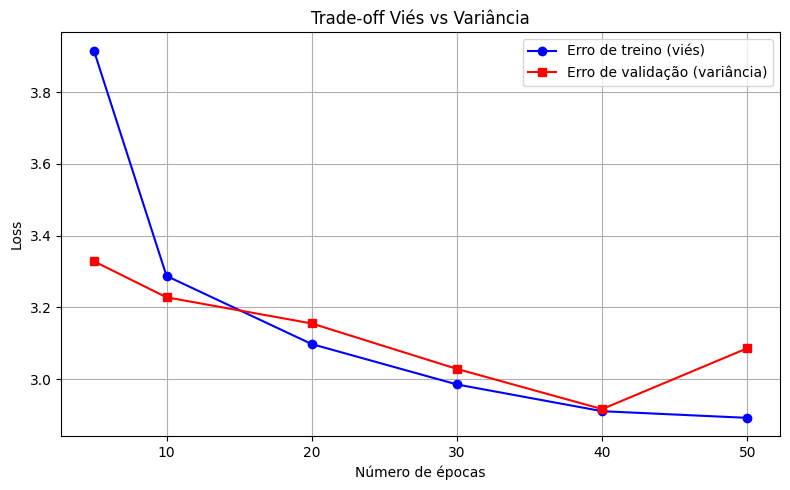

In [20]:
# 📈 Plotar gráfico de bias-variance

import matplotlib.pyplot as plt
from IPython.display import display

plt.figure(figsize=(8, 5))
plt.plot(epochs_list, train_losses, marker='o', label='Erro de treino (viés)', color='blue')
plt.plot(epochs_list, val_losses, marker='s', label='Erro de validação (variância)', color='red')
plt.xlabel("Número de épocas")
plt.ylabel("Loss")
plt.title("Trade-off Viés vs Variância")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Exibir de forma confiável no Colab
display(plt.gcf())
plt.close()


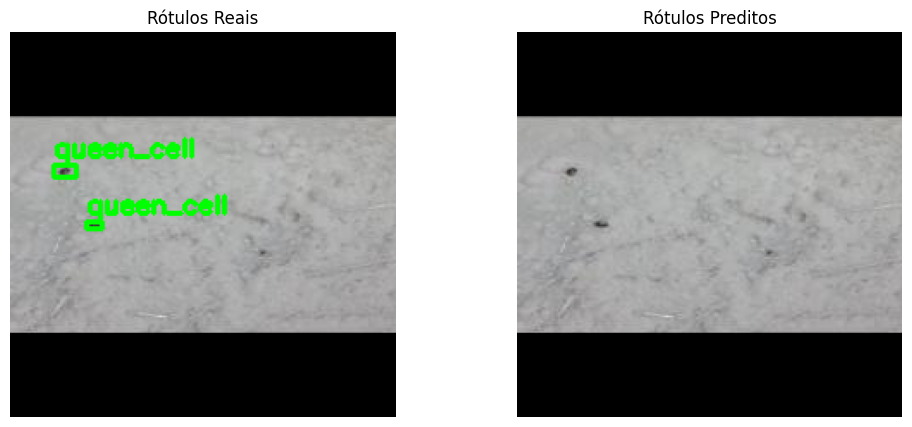

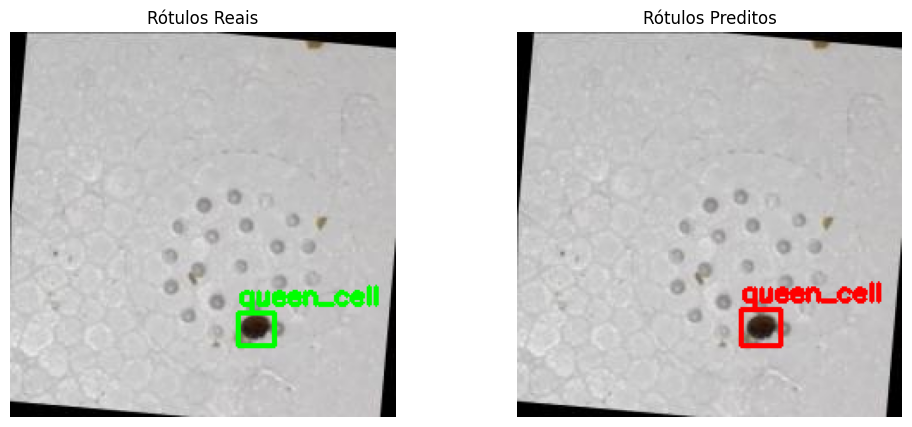

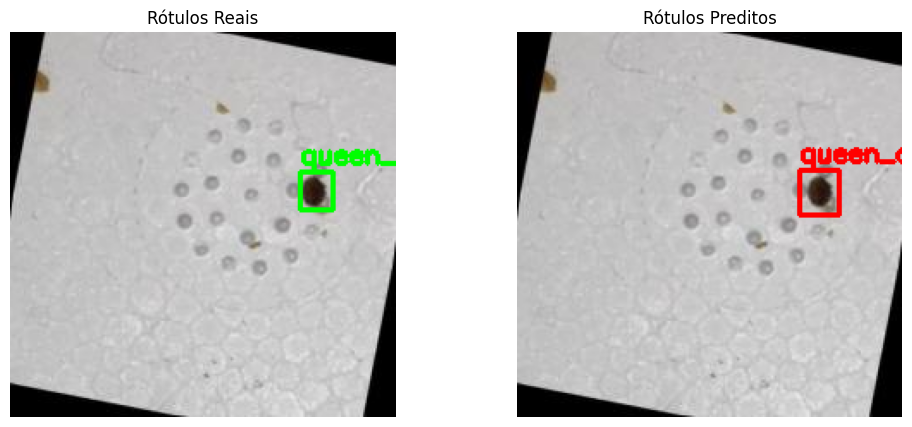

In [17]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import display
import glob
import os

# Carregar modelo treinado
model = YOLO("modelo_bees.pt")

# Caminhos
img_dir = "bees/test/images"     # imagens de teste
label_dir = "bees/test/labels"   # labels reais em formato YOLO

# Função para desenhar caixas delimitadoras
def draw_boxes(img, labels, color=(0, 255, 0), names=None):
    h, w = img.shape[:2]
    for lbl in labels:
        cls, x, y, bw, bh = map(float, lbl)
        x1, y1 = int((x - bw / 2) * w), int((y - bh / 2) * h)
        x2, y2 = int((x + bw / 2) * w), int((y + bh / 2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        label_name = str(int(cls))
        if names and int(cls) < len(names):
            label_name = names[int(cls)]
        cv2.putText(img, label_name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return img

# Buscar até 3 imagens de teste (qualquer formato comum)
images = sorted(glob.glob(os.path.join(img_dir, "*.*")))[:3]

for img_path in images:
    img_name = os.path.basename(img_path).rsplit(".", 1)[0] + ".txt"
    label_path = os.path.join(label_dir, img_name)

    # Ler imagem e converter para RGB
    img = cv2.imread(img_path)
    if img is None:
        continue  # pula se imagem estiver corrompida
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Carregar labels reais se existirem
    gt_labels = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()
            gt_labels = [line.strip().split() for line in lines if line.strip()]

    # Fazer predição
    results = model.predict(source=img_path, verbose=False)
    pred_labels = []
    for box in results[0].boxes:
        cls = box.cls.cpu().numpy()[0]
        x, y, bw, bh = box.xywhn.cpu().numpy()[0]
        pred_labels.append([cls, x, y, bw, bh])

    # Clonar imagem para sobrepor caixas
    img_gt = img.copy()
    img_pred = img.copy()

    img_gt = draw_boxes(img_gt, gt_labels, color=(0, 255, 0), names=model.names)     # Rótulos reais
    img_pred = draw_boxes(img_pred, pred_labels, color=(255, 0, 0), names=model.names)  # Rótulos preditos

    # Exibir lado a lado
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_gt)
    plt.title("Rótulos Reais")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_pred)
    plt.title("Rótulos Preditos")
    plt.axis("off")

    display(plt.gcf())
    plt.close()
